In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pprint

path = './data/road-game-default-rtdb-export.json'

branchs = ['all-games','complete-games']

In [2]:
#load data from the json file
with open(path) as train_file:
    data = json.load(train_file)

In [3]:
branch = branchs[0]
df = pd.DataFrame.from_dict(data[branch], orient='index')
df.reset_index(level=0, inplace=True)
df = df.dropna(subset=['log'])
df.head(5)

,index,additional_comments,aggressively_value,behavior,birthYear,blueScore,computer_value,drivinglicense,education,gender,generously_value,log,press-the-read-instructions-button,redScore,steps,win,wisely_value,predictable_value,answer-the-quiz
0,-MZiWIwdnrn8TJ034z2w,,5.0,carefulBehavior,1961,20.0,5.0,valid,BA,male,6.0,"[None, {'blue': 'from: a6, action: left', 'red...",True,23.0,7.0,True,1.0,NaN,NaN
1,-MZiWUxZs8BvWglGhc9r,,2.0,carefulBehavior,1982,19.0,6.0,valid,BA,female,4.0,"[None, {'blue': 'from: a6, action: left', 'red...",True,22.0,8.0,True,4.0,NaN,NaN
2,-MZiWYgxyToIiCSDQY8S,,5.0,aggressiveBehavior,1953,-105.0,7.0,valid,BA,female,2.0,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105.0,5.0,False,6.0,NaN,NaN
3,-MZiWYz_z_BcQlpReXf_,,6.0,aggressiveBehavior,1990,25.0,7.0,valid,Master's degree,male,2.0,"[None, {'blue': 'from: a6, action: left', 'red...",True,21.0,9.0,True,2.0,NaN,NaN
4,-MZiWaNZ6n3K3AZDfr-q,,6.0,aggressiveBehavior,1953,-105.0,6.0,valid,BA,female,2.0,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105.0,5.0,False,1.0,NaN,NaN


In [4]:
df.columns

Index(['index', 'additional_comments', 'aggressively_value', 'behavior',
       'birthYear', 'blueScore', 'computer_value', 'drivinglicense',
       'education', 'gender', 'generously_value', 'log',
       'press-the-read-instructions-button', 'redScore', 'steps', 'win',
       'wisely_value', 'predictable_value', 'answer-the-quiz'],
      dtype='object')

## participants details:

In [5]:
df['gender'].value_counts()

male      392
female    240
Name: gender, dtype: int64

In [6]:
df['education'].value_counts()

BA                 369
High School        178
Master's degree     75
Ph.D                 7
none                 2
Name: education, dtype: int64

In [7]:
df['drivinglicense'].value_counts()

valid      583
none        33
invalid     15
Name: drivinglicense, dtype: int64

In [8]:
df.groupby('gender').mean()[['blueScore', 'redScore']]

,blueScore,redScore
gender,,
female,-12.783333,-13.650000
male,-16.464286,-16.617347


In [9]:
df.groupby('education').mean()[['blueScore', 'redScore']]

,blueScore,redScore
education,,
BA,-17.791328,-18.040650
High School,-7.022472,-7.713483
Master's degree,-15.120000,-15.600000
Ph.D,-54.714286,-56.714286
none,-107.500000,-107.500000


In [10]:
df.groupby('drivinglicense').mean()[['blueScore', 'redScore']]

,blueScore,redScore
drivinglicense,,
invalid,-52.866667,-52.533333
none,1.939394,1.121212
valid,-15.125214,-15.542024


In [11]:
def genarateTable(col_col, index_score):
    # index_score = 'blueScore' or 'redScore'
    to_exel = df[[index_score, col_col]]

    table_blueScore = pd.DataFrame(index=to_exel.index, columns=to_exel.groupby(col_col).count().index)
    for agent in table_blueScore.columns:
        table_blueScore[agent] = to_exel[to_exel[col_col] == agent][index_score]

    return pd.concat([table_blueScore[agent].dropna().reset_index().drop('index', axis=1) for agent in table_blueScore.columns], axis=1)

In [12]:
dl_b = genarateTable('drivinglicense', 'blueScore')
dl_r = genarateTable('drivinglicense', 'redScore')

with pd.ExcelWriter('./data/drivinglicense.xlsx') as writer:
    dl_b.to_excel(writer, sheet_name='blueScore')
    dl_r.to_excel(writer, sheet_name='redScore')

FileCreateError: [Errno 13] Permission denied: './data/drivinglicense.xlsx'

In [ ]:
# df.groupby('additional_comments')['additional_comments'].count()

In [13]:
df['additional_comments'][df['additional_comments'].notna()][df['additional_comments'] != ""]

8                                    Thankyouandstaysafe
11     Icouldn'tmovetotherightusingtherightarrowasins...
12                                                  none
24                                           GodBlessYou
34                                                  none
                             ...                        
602                                                 None
608                                                 GOOD
609                                                 GOOD
626                                                 GOOD
629                                                 None
Name: additional_comments, Length: 97, dtype: object

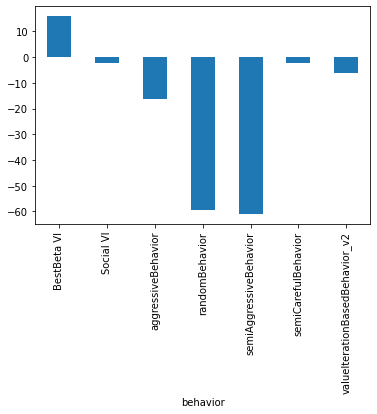

In [26]:
df.groupby('behavior')['blueScore'].mean().drop(['carefulBehavior'], axis=0).plot(kind='bar')

In [51]:
final_scores = pd.DataFrame(df.groupby('behavior')['blueScore'].mean().drop(['carefulBehavior'], axis=0))
final_scores.index = ["SARL", "Social VI","Aggressive","Random","Semi-aggressive","Careful","Velocity VI"]
final_scores.loc['Velocity VI'] = -5.33
final_scores = pd.concat([final_scores, pd.DataFrame([-6.34], index=['Non-Velocity VI'], columns=['blueScore'])])
final_scores.reset_index(inplace=True)
final_scores

,index,blueScore
0,SARL,15.878378
1,Social VI,-2.358696
2,Aggressive,-16.277778
3,Random,-59.402439
4,Semi-aggressive,-60.965909
5,Careful,-2.290698
6,Velocity VI,-5.330000
7,Non-Velocity VI,-6.340000


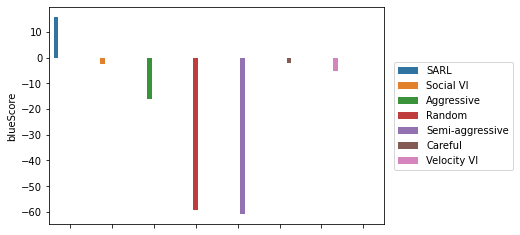

In [81]:
labels = ["SARL", "Social VI","Aggressive","Random","Semi-aggressive","Careful","Velocity VI"]

ax = sns.barplot(x="index", y="blueScore", data=final_scores, capsize=.2, hue='index', hue_order=labels)

# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value

#         # we change the bar width
#         patch.set_width(new_value)

#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .6)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
ax.set(xlabel=None)
ax.set(xticklabels=[])
plt.show()

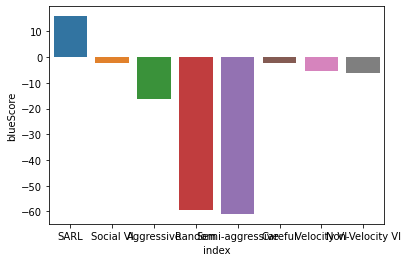

In [91]:
sns.barplot(x="index", y="blueScore", data=final_scores, estimator=np.mean, ci=85, capsize=7)

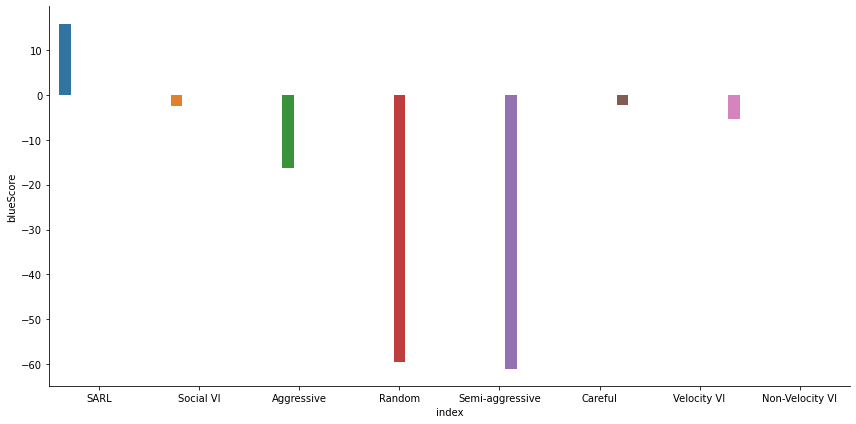

In [77]:
ax = sns.factorplot(x='index', y='blueScore', hue='index', hue_order=labels,
                        size=6,  aspect=2,
                        kind='bar', 
#                         width=10, # Factorplot passes arguments through
                        data=final_scores)